Deprecation Warning! This will no longer be supported in future versions.
Use 'from PyLTSpice import RawWRead' for a direct import of the Raw Reading class
['time', 'v(v_in)', 'v(v_out)', 't_rise', 't_fall', 't_delay']


OrderedDict({'Filename': WindowsPath('C:/Users/HP/eda/designs/thesis/workspace/thesis_hp/designs/analog_inverter/1_schematics/simulations/tb_inv_tran.raw'), 'Title': '** sch_path: /foss/designs/thesis/workspace/thesis_hp/designs/analog_inverter/1_schematics/tb_analog_inverter_tran.sch', 'Date': 'Mon May 12 00:07:40  2025', 'Command': 'ngspice-44.2, Build Tue Mar 18 10:43:20 UTC 2025', 'Plotname': 'Transient Analysis', 'Flags': 'real', 'No. Variables': 6, 'No. Points': 2029, 'Variables': ['time', 'v(v_in)', 'v(v_out)', 't_rise', 't_fall', 't_delay']})


number of sweeps in the simulation: 1
trise:  159.1707 ps
tfall:  121.058 ps
tdelay:  15.4891 ps


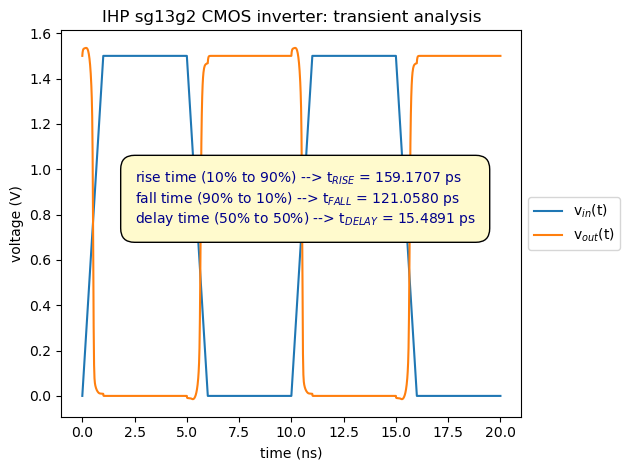

['v(v-sweep)', 'v(v_in)', 'v(v_out)', 'v(dvout)', 'vsw', 'vil', 'vih', 'vol', 'voh']


OrderedDict({'Filename': WindowsPath('C:/Users/HP/eda/designs/thesis/workspace/thesis_hp/designs/analog_inverter/1_schematics/simulations/tb_inv_dc.raw'), 'Title': '** sch_path: /foss/designs/thesis/workspace/thesis_hp/designs/analog_inverter/1_schematics/tb_analog_inverter_dc.sch', 'Date': 'Mon May 12 00:08:14  2025', 'Command': 'ngspice-44.2, Build Tue Mar 18 10:43:20 UTC 2025', 'Plotname': 'DC transfer characteristic', 'Flags': 'real', 'No. Variables': 9, 'No. Points': 151, 'Variables': ['v(v-sweep)', 'v(v_in)', 'v(v_out)', 'v(dvout)', 'vsw', 'vil', 'vih', 'vol', 'voh']})


number of sweeps in the simulation: 1
Vsw:  0.6382 V
Vih:  0.7272 V
Voh:  1.3982 V
Vil:  0.5146 V
Vol:  0.1079 V
The max DC gain is 29.4859(V/V) at VIN=0.6400(V)


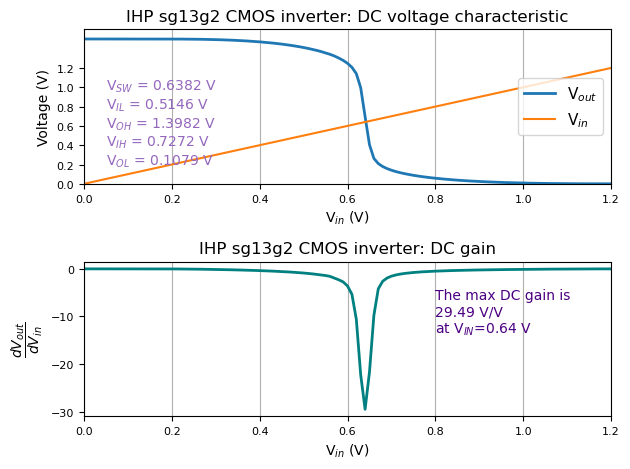

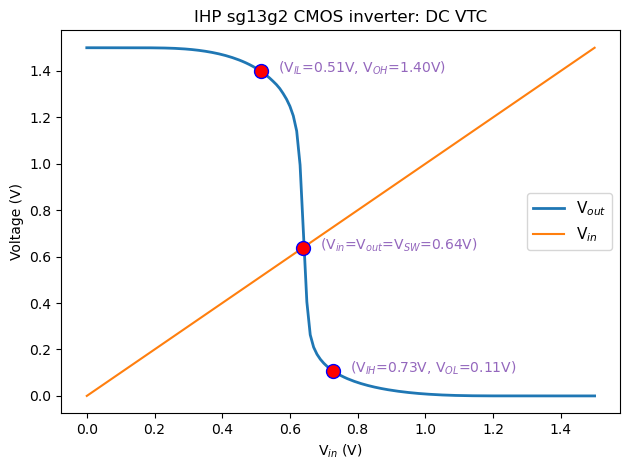

In [1]:
# inverter_sim.py

from PyLTSpice.LTSpice_RawRead import RawRead as RawRead
import matplotlib.pyplot as plt
import numpy as np

# Directory to save SVGs
output_dir = "../1_schematics/simulations"

LTR = RawRead("../1_schematics/simulations/tb_inv_tran.raw")

print(LTR.get_trace_names())
print("\n")
print(LTR.get_raw_property())
print("\n")
steps = LTR.get_steps()
num_steps = len(steps)
print('number of sweeps in the simulation:', num_steps)

# objects containing the data
t = LTR.get_trace('time')
Vo = LTR.get_trace('v(v_out)')
Vi = LTR.get_trace('v(v_in)')
t_delay = LTR.get_trace('t_delay')
t_rise = LTR.get_trace('t_rise')
t_fall = LTR.get_trace('t_fall')

# extract the data from the objects
if num_steps == 1:
   time = t.get_time_axis(0)
   Vout = Vo.get_wave(0)
   Vin = Vi.get_wave(0)
   tdelay = t_delay.get_wave(0)
   trise  = t_rise.get_wave(0)
   tfall  = t_fall.get_wave(0)

# spice measurements are the first value of the data vector
trise = trise[0]*1e12   # units: ps
tfall = tfall[0]*1e12   # units: ps
tdelay = tdelay[0]*1e12 # units: ps
print('trise: ',round(trise,4), 'ps')
print('tfall: ',round(tfall,4), 'ps')
print('tdelay: ', round(tdelay,4), 'ps')

str_1 = 'rise time (10%% to 90%%) --> t$_{RISE}$ = %.4f ps' % trise
str_2 = 'fall time (90%% to 10%%) --> t$_{FALL}$ = %.4f ps' % tfall
str_3 = 'delay time (50%% to 50%%) --> t$_{DELAY}$ = %.4f ps' % tdelay

# Figure 1
fig1 = plt.figure()

plt.title("IHP sg13g2 CMOS inverter: transient analysis")
plt.ylabel("voltage (V)")
plt.xlabel("time (ns)")
plt.plot(time*1e9,Vin, label="v$_{in}$(t)")
plt.plot(time*1e9,Vout, label="v$_{out}$(t)")
plt.annotate(str_1+'\n'+str_2+'\n'+str_3,
  xy=(2.5,1),ha='left', va='top', color='darkblue', fontsize=10,
  bbox=dict(facecolor='lemonchiffon', edgecolor='black',boxstyle='round,pad=1'))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left",frameon=True,fontsize=10)

plt.tight_layout()
plt.savefig(f"{output_dir}/_fig_inverter_transient.svg", format='svg')
plt.show()

# ------------------------------------------------

LTR = RawRead("../1_schematics/simulations/tb_inv_dc.raw")

print(LTR.get_trace_names())
print("\n")
print(LTR.get_raw_property())
print("\n")
steps = LTR.get_steps()
num_steps = len(steps)
print('number of sweeps in the simulation:', num_steps)

# objects containing the data
Vo = LTR.get_trace('v(v_out)')
Vi = LTR.get_trace('v(v_in)')
DVo = LTR.get_trace('v(dvout)')
vsw = LTR.get_trace('vsw')
vih = LTR.get_trace('vih')
vil = LTR.get_trace('vil')
voh = LTR.get_trace('voh')
vol = LTR.get_trace('vol')

# extract the data from the objects
if num_steps == 1:
   Vout = Vo.get_wave(0)
   Vin = Vi.get_wave(0)
   DVout = DVo.get_wave(0)
   Vsw = vsw.get_wave(0)
   Vih = vih.get_wave(0)
   Voh = voh.get_wave(0)
   Vil = vil.get_wave(0)
   Vol = vol.get_wave(0)

# spice measurements are the first value of the data vector
vsw =  Vsw[0]
vih =  Vih[0]
voh =  Voh[0]
vil =  Vil[0]
vol =  Vol[0]
print('Vsw: ',round(vsw,4), 'V')
print('Vih: ',round(vih,4), 'V')
print('Voh: ',round(voh,4), 'V')
print('Vil: ',round(vil,4), 'V')
print('Vol: ',round(vol,4), 'V')


str_1 = "V$_{SW}$ = %.4f V" %vsw
str_2 = "V$_{IL}$ = %.4f V" %vil
str_3 = "V$_{OH}$ = %.4f V" %voh
str_4 = "V$_{IH}$ = %.4f V" %vih
str_5 = "V$_{OL}$ = %.4f V" %vol

# compute max DC gain and corresponding bias voltage VIN
maxgain = abs(min(DVout))
tupla = np.where(DVout == min(DVout))
index = tupla[0][0]
VIN = Vin[index]
print("The max DC gain is %.4f(V/V) at VIN=%.4f(V)" % (maxgain,VIN))

str_6 = "The max DC gain is"
str_7 = "%.2f V/V " % maxgain
str_8 = "at V$_{IN}$=%.2f V" % VIN

# Figure 2
fig2 = plt.figure()

plt.subplot(211) # 2 plots - col 1, row 1
plt.grid(True, which="both", axis="x")
plt.title("IHP sg13g2 CMOS inverter: DC voltage characteristic" )
plt.ylabel("Voltage (V)")
plt.xlabel("V$_{in}$ (V)")
plt.plot(Vin, Vout, label="V$_{out}$",linewidth=2.0)
plt.plot(Vin, Vin, label="V$_{in}$")
plt.xlim((0,1.2))
plt.ylim((0,1.6))
plt.yticks(np.arange(0,1.21, step=0.2))
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.annotate(str_1+'\n'+str_2+'\n'+str_3+'\n'+str_4+'\n'+str_5+'\n', xy=(0.05,1.1),ha='left', va='top',
            color='tab:purple',fontsize=10)
plt.legend(loc="center right",frameon=True,fontsize=11)

plt.subplot(212) # 2 plots - plot col 1, row 2
plt.grid(True, which="both", axis="x")
plt.title("IHP sg13g2 CMOS inverter: DC gain" )
plt.ylabel(r"$\dfrac{dV_{out}}{dV_{in}}$",rotation=90)
plt.yticks(fontsize=8,rotation=0)
plt.xticks(fontsize=8)
plt.xlabel("V$_{in}$ (V)")
plt.plot(Vin, DVout, linewidth=2, color='teal')
plt.xlim((0,1.2))
plt.annotate(str_6+'\n'+str_7+'\n'+str_8, xy=(0.8,-4),ha='left', va='top',
             color='indigo',fontsize=10)

fig2.tight_layout()
plt.savefig(f"{output_dir}/_fig_inverter_dc_analysis.svg", format='svg')
plt.show()

# Figure 3
fig3 = plt.figure()

str_a = "V$_{IL}$=%.2fV" %vil
str_b = "V$_{OH}$=%.2fV" %voh
str_c = "V$_{IH}$=%.2fV" %vih
str_d = "V$_{OL}$=%.2fV" %vol
str_e = "V$_{in}$=V$_{out}$=V$_{SW}$=%.2fV" %vsw

plt.title("IHP sg13g2 CMOS inverter: DC VTC")
plt.ylabel("Voltage (V)")
plt.xlabel("V$_{in}$ (V)")
plt.plot(Vin, Vout, label="V$_{out}$",linewidth=2.0)
plt.plot(Vin, Vin, label="V$_{in}$")
plt.legend(loc="center right",frameon=True,fontsize=11)

plt.plot(vil, voh, marker="o", markersize=10, markeredgecolor="blue", markerfacecolor="red")
plt.annotate('('+str_a+', '+str_b+')', xy=(vil+0.05,voh+0.05),ha='left', va='top',
            color='tab:purple',fontsize=10)
plt.plot(vih, vol, marker="o", markersize=10, markeredgecolor="blue", markerfacecolor="red")
plt.annotate('('+str_c+', '+str_d+')', xy=(vih+0.05,vol+0.05),ha='left', va='top',
            color='tab:purple',fontsize=10)
plt.plot(vsw, vsw, marker="o", markersize=10, markeredgecolor="blue", markerfacecolor="red")
plt.annotate('('+str_e+')', xy=(vsw+0.05,vsw+0.05),ha='left', va='top',
            color='tab:purple',fontsize=10)

fig3.tight_layout()
plt.savefig(f"{output_dir}/_fig_inverter_vtc.svg", format='svg')
plt.show()
